**Question 1**
Given three integer arrays arr1, arr2 and arr3 **sorted** in **strictly increasing** order, return a sorted array of **only** the integers that appeared in **all** three arrays.

**Example 1:**

Input: arr1 = [1,2,3,4,5], arr2 = [1,2,5,7,9], arr3 = [1,3,4,5,8]

Output: [1,5]

**Explanation:** Only 1 and 5 appeared in the three arrays.

In [2]:
def IntersectionOfSortedArray(ar1, ar2, ar3, n1, n2, n3):
    i, j, k =0,0,0
    res = []
    while(i < n1 and j < n2 and k < n3):

        if (ar1[i] == ar2[j] and ar2[j] == ar3[k]):
            if ar1[i] not in res:
                res.append(ar1[i])
            i += 1
            j += 1
            k += 1

        elif ar1[i] < ar2[j]:
            i += 1

        elif ar2[j] < ar3[k]:
            j +=1

        else:
            k += 1
    
    print(res)

# ar1 = [1, 5, 10, 20, 40, 80]
# ar2 = [6, 7, 20, 80, 100]
# ar3 = [3, 4, 15, 20, 30, 70, 80, 120]
ar1 = [1, 5, 10, 20, 40, 80, 80]
ar2 = [6, 7, 20, 80, 80, 100]
ar3 = [3, 4, 15, 20, 30, 70, 80, 80, 120]
n1 = len(ar1)
n2 = len(ar2)
n3 = len(ar3)

IntersectionOfSortedArray(ar1, ar2, ar3, n1, n2, n3)

# tc = O(n1 + n2 + n3). 
# sc = O(n)

[20, 80]


**Question 2**

Given two **0-indexed** integer arrays nums1 and nums2, return *a list* answer *of size* 2 *where:*

- answer[0] *is a list of all **distinct** integers in* nums1 *which are **not** present in* nums2*.*
- answer[1] *is a list of all **distinct** integers in* nums2 *which are **not** present in* nums1.

**Note** that the integers in the lists may be returned in **any** order.

**Example 1:**

**Input:** nums1 = [1,2,3], nums2 = [2,4,6]

**Output:** [[1,3],[4,6]]

**Explanation:**

For nums1, nums1[1] = 2 is present at index 0 of nums2, whereas nums1[0] = 1 and nums1[2] = 3 are not present in nums2. Therefore, answer[0] = [1,3].

For nums2, nums2[0] = 2 is present at index 1 of nums1, whereas nums2[1] = 4 and nums2[2] = 6 are not present in nums2. Therefore, answer[1] = [4,6].


In [8]:
def getElementInFirst(n1,n2):
    s = set(n2)
    res = []
    for i in n1:
        if i not in s and i not in res:
            res.append(i)
    
    return res

def findDifference(nums1, nums2):
    # res = []
    # res.append(getElementInFirst(nums1, nums2))
    # res.append(getElementInFirst(nums2,nums1))
    return [getElementInFirst(nums1, nums2), getElementInFirst(nums2,nums1)]

nums1 = [1,2,3]
nums2 = [2,4,6]

# nums1 = [1,2,3,3]
# nums2 = [1,1,2,2]

findDifference(nums1,nums2)

[[1, 3], [4, 6]]

**Question 3**
Given a 2D integer array matrix, return *the **transpose** of* matrix.

The **transpose** of a matrix is the matrix flipped over its main diagonal, switching the matrix's row and column indices.

**Example 1:**

Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]

Output: [[1,4,7],[2,5,8],[3,6,9]]

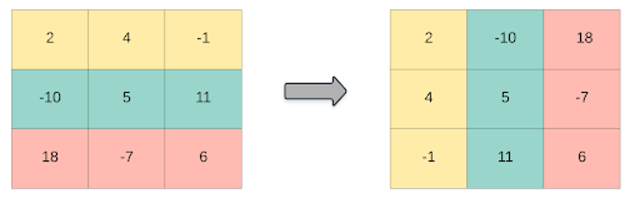

In [23]:
def transpose(mat):
    row = len(mat)
    col = len(mat[0])
    for r in range(row):
        for c in range(1,col):
            mat[r][c], mat[c][r] = mat[c][r], mat[r][c]

    return mat

matrix = [[1,2,3],[4,5,6],[7,8,9]]
res = transpose(matrix)
for i in res:
    print(i)

# tc = O(n*m) 
# sc = O(1)

[1, 4, 7]
[2, 5, 6]
[3, 8, 9]
[[1, 2, 3], [4, 5, 8], [7, 6, 9]]


**Question 4**
Given an integer array nums of 2n integers, group these integers into n pairs (a1, b1), (a2, b2), ..., (an, bn) such that the sum of min(ai, bi) for all i is **maximized**. Return *the maximized sum*.

**Example 1:**

Input: nums = [1,4,3,2]

Output: 4

**Explanation:** All possible pairings (ignoring the ordering of elements) are:

1. (1, 4), (2, 3) -> min(1, 4) + min(2, 3) = 1 + 2 = 3

2. (1, 3), (2, 4) -> min(1, 3) + min(2, 4) = 1 + 2 = 3

3. (1, 2), (3, 4) -> min(1, 2) + min(3, 4) = 1 + 3 = 4

So the maximum possible sum is 4.


In [26]:
def arrayPairSum(nums):
    nums.sort()
    maxSum = 0
    for i in range(0, len(nums), 2):
        maxSum += nums[i]
    return maxSum

nums = [6,2,6,5,1,2]

arrayPairSum(nums)

9

**Question 5**
You have n coins and you want to build a staircase with these coins. The staircase consists of k rows where the ith row has exactly i coins. The last row of the staircase **may be** incomplete.

Given the integer n, return *the number of **complete rows** of the staircase you will build*.


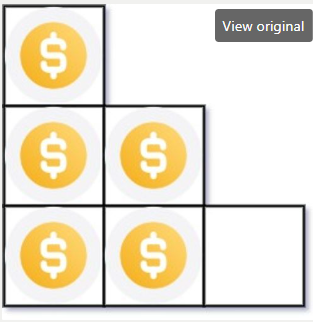

**Input:** n = 5

**Output:** 2

**Explanation:** Because the 3rd row is incomplete, we return 2.

**Algorithm**

Assume that the answer is k, i.e. we've managed to complete k rows of coins.
These completed rows contain in total 1+2+...+k = k * (k+1)/2 coins.

We could now reformulate the problem as follows:

Find the maximum k such that k*(k+1)/2  ≤N .

The problem seems to be one of those search problems. And instead of naive iteration, one could resort to another more efficient algorithm called binary search.

In [30]:
def arrangeCoins(n: int) -> int:
    left, right = 0, n
    while left <= right:
        k = (right + left) // 2
        curr = k * (k + 1) // 2
        if curr == n:
            return k
        if n < curr:
            right = k - 1
        else:
            left = k + 1
    return right

arrangeCoins(1804289383)

60070

**Question 6**
Given an integer array nums sorted in **non-decreasing** order, return *an array of **the squares of each number** sorted in non-decreasing order*.

**Example 1:**

Input: nums = [-4,-1,0,3,10]

Output: [0,1,9,16,100]

**Explanation:** After squaring, the array becomes [16,1,0,9,100].
After sorting, it becomes [0,1,9,16,100]

**Algorithm**: two-pointer method as the array is already sorted we can compare the first and last element to check which is bigger and proceed with the result

- Initialize left=0 and right=n-1
- if abs(left) >= abs(right) then store square(arr[left])
at the end of result array and increment left pointer
- else store square(arr[right]) in the result array and decrement right pointer
- decrement index of result array

In [6]:
def sortedSquares(nums):
    n = len(nums)
    left = 0
    right = n-1
    res = [0 for x in nums]
    
    for i in range(n-1, -1,-1):
        # print(i)
        if abs(nums[left]) > abs(nums[right]):
            res[i] = nums[left] * nums[left]
            left += 1
        else:
            res[i] = nums[right] * nums[right]
            right -= 1

    return res
    
        


# nums = [-4,-1,0,3,10]
nums = [-12,-11,-10,-9,-8,-7]
sortedSquares(nums)

# tc = sc = O(n)

[49, 64, 81, 100, 121, 144]

**Question 7**
You are given an m x n matrix M initialized with all 0's and an array of operations ops, where ops[i] = [ai, bi] means M[x][y] should be incremented by one for all 0 <= x < ai and 0 <= y < bi.

Count and return *the number of maximum integers in the matrix after performing all the operations*

**Example 1:**

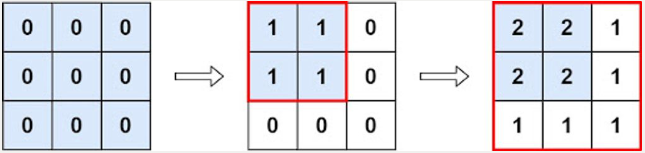

**Input:** m = 3, n = 3, ops = [[2,2],[3,3]]

**Output:** 4

**Explanation:** The maximum integer in M is 2, and there are four of it in M. So return 4.

**Approach**: Store the smallest x and y values. This will give us the dimesions of the grid which is affected by every operation. We onl care about the grid which is affected by every operation because this will be the greatest value, and we know that at least the i=0 j =0 spot will be affected by every opertaion.


In [3]:
def maxCount(m:int,  n:int,  ops:list[list[int]]):
    length = len(ops)
    if length == 0:
        return m*n
    
    result = [ops[0][0], ops[0][1]]
    for i in range(1,length):
        result[0] = min(result[0], ops[i][0])
        result[1] = min(result[1], ops[i][1])
    
    return result[0] * result[1]


# Drivercode

m = 3
n = 3
# ops = [[2,2],[3,3]]
# ops = [[2,2],[3,3],[3,3],[3,3],[2,2],[3,3],[3,3],[3,3],[2,2],[3,3],[3,3],[3,3]]
ops = []
maxCount(m,n,ops)

# tc = O(n)
# sc = O(1)

9

**Question 8**

Given the array nums consisting of 2n elements in the form [x1,x2,...,xn,y1,y2,...,yn].

*Return the array in the form* [x1,y1,x2,y2,...,xn,yn].

**Example 1:**

**Input:** nums = [2,5,1,3,4,7], n = 3

**Output:** [2,3,5,4,1,7]

**Explanation:** Since x1=2, x2=5, x3=1, y1=3, y2=4, y3=7 then the answer is [2,3,5,4,1,7].

In [6]:
def shuffle(nums, n):
    j = n
    res = []
    for i in range(n):
        res.append(nums[i])
        res.append(nums[j])
        j += 1

    return res

# DriverCode

nums = [1,2,3,4,4,3,2,1]
n = 4

shuffle(nums,n)


[1, 4, 2, 3, 3, 2, 4, 1]